In [1]:
% matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from datetime import date

import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
plt.rcParams['font.family'] = 'IPAPGothic' #全体のフォントを設定
plt.rcParams['font.size'] = 12 #フォントサイズを設定 default : 12

In [4]:
df = pickle.load(open('merged_data.pkl', 'rb'))

In [5]:
df.head()

,name,sex,prize,hair,debut_weight,race_count,win_count,birth_date_from_beginning_of_year,crop_win_count,crop_grade_horse_count,...,name_breeder,win_count_breeder,prize_breeder,name_sire,win_ratio,earning_index,prize_sire,name_bms,win_ratio_bms,earning_index_bms
0,ラッキーライラック,牝,20460.6,栗毛,480.0,5,4,92,7.0,1.0,...,ノーザンファーム,184.0,445896.6,オルフェーヴル,0.139,1.23,1781.8,Flower Alley,1.000,18.62
1,アーモンドアイ,牝,17595.8,鹿毛,472.0,4,3,68,10.0,1.0,...,ノーザンファーム,184.0,445896.6,ロードカナロア,0.198,1.37,1482.4,サンデーサイレンス,0.159,1.26
2,エポカドーロ,牡,17421.2,黒鹿毛,484.0,5,3,45,11.0,1.0,...,田上徹,4.0,18126.2,オルフェーヴル,0.139,1.23,1781.8,フォーティナイナー,0.203,2.02
3,ダノンプレミアム,牡,16651.3,青鹿毛,476.0,4,4,92,7.0,1.0,...,ケイアイファーム,9.0,26639.7,ディープインパクト,0.197,1.87,1860.3,Intikhab,0.200,6.02
4,ステルヴィオ,牡,13669.0,鹿毛,462.0,6,3,14,5.0,1.0,...,ノーザンファーム,184.0,445896.6,ロードカナロア,0.198,1.37,1482.4,ファルブラヴ,0.346,2.61


In [6]:
df = df.drop(['hair', 'race_count', 'win_count', 'name_trainer', 'name_breeder', 'name_sire', 'name_bms'], axis=1)

In [7]:
df.head()

,name,sex,prize,debut_weight,birth_date_from_beginning_of_year,crop_win_count,crop_grade_horse_count,crop_grade_win_count,stable_trainer,win_count_trainer,prize_trainer,win_count_breeder,prize_breeder,win_ratio,earning_index,prize_sire,win_ratio_bms,earning_index_bms
0,ラッキーライラック,牝,20460.6,480.0,92,7.0,1.0,3.0,栗東,7.0,21590.4,184.0,445896.6,0.139,1.23,1781.8,1.000,18.62
1,アーモンドアイ,牝,17595.8,472.0,68,10.0,1.0,2.0,美浦,10.0,41764.5,184.0,445896.6,0.198,1.37,1482.4,0.159,1.26
2,エポカドーロ,牡,17421.2,484.0,45,11.0,1.0,1.0,栗東,29.0,68888.9,4.0,18126.2,0.139,1.23,1781.8,0.203,2.02
3,ダノンプレミアム,牡,16651.3,476.0,92,7.0,1.0,3.0,栗東,14.0,29130.2,9.0,26639.7,0.197,1.87,1860.3,0.200,6.02
4,ステルヴィオ,牡,13669.0,462.0,14,5.0,1.0,1.0,美浦,15.0,27403.7,184.0,445896.6,0.198,1.37,1482.4,0.346,2.61


In [8]:
df = df.drop(['name'], axis=1)

In [9]:
# One hot encodingするカラム
dummy_columns = ['sex', 'stable_trainer']

In [10]:
df = pd.get_dummies(df, columns=dummy_columns)

In [11]:
# logスケールで予測する
y = np.log1p(np.array(df.prize))

In [12]:
df = df.drop(['prize'], axis=1)

In [13]:
df.head()

,debut_weight,birth_date_from_beginning_of_year,crop_win_count,crop_grade_horse_count,crop_grade_win_count,win_count_trainer,prize_trainer,win_count_breeder,prize_breeder,win_ratio,earning_index,prize_sire,win_ratio_bms,earning_index_bms,sex_セ,sex_牝,sex_牡,stable_trainer_栗東,stable_trainer_美浦
0,480.0,92,7.0,1.0,3.0,7.0,21590.4,184.0,445896.6,0.139,1.23,1781.8,1.000,18.62,0,1,0,1,0
1,472.0,68,10.0,1.0,2.0,10.0,41764.5,184.0,445896.6,0.198,1.37,1482.4,0.159,1.26,0,1,0,0,1
2,484.0,45,11.0,1.0,1.0,29.0,68888.9,4.0,18126.2,0.139,1.23,1781.8,0.203,2.02,0,0,1,1,0
3,476.0,92,7.0,1.0,3.0,14.0,29130.2,9.0,26639.7,0.197,1.87,1860.3,0.200,6.02,0,0,1,1,0
4,462.0,14,5.0,1.0,1.0,15.0,27403.7,184.0,445896.6,0.198,1.37,1482.4,0.346,2.61,0,0,1,0,1


In [14]:
X = df

In [15]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
reg = RandomForestRegressor()

In [17]:
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [18]:
# R^2 score of training dataset
reg.score(X_train, y_train)

0.8388022805539271

In [19]:
# R^2 score of test dataset
reg.score(X_test, y_test)

0.07739466769346559

In [20]:
reg.feature_importances_

array([0.09205744, 0.10624092, 0.09345783, 0.00330613, 0.00604472,
       0.05577571, 0.12368417, 0.03942547, 0.08479656, 0.08021962,
       0.05970552, 0.0549923 , 0.07230039, 0.08919095, 0.00388217,
       0.00542335, 0.01685966, 0.00664722, 0.00598986])

In [21]:
df.columns

Index(['debut_weight', 'birth_date_from_beginning_of_year', 'crop_win_count',
       'crop_grade_horse_count', 'crop_grade_win_count', 'win_count_trainer',
       'prize_trainer', 'win_count_breeder', 'prize_breeder', 'win_ratio',
       'earning_index', 'prize_sire', 'win_ratio_bms', 'earning_index_bms',
       'sex_セ', 'sex_牝', 'sex_牡', 'stable_trainer_栗東', 'stable_trainer_美浦'],
      dtype='object')

In [22]:
indices = np.argsort(reg.feature_importances_)

<BarContainer object of 19 artists>

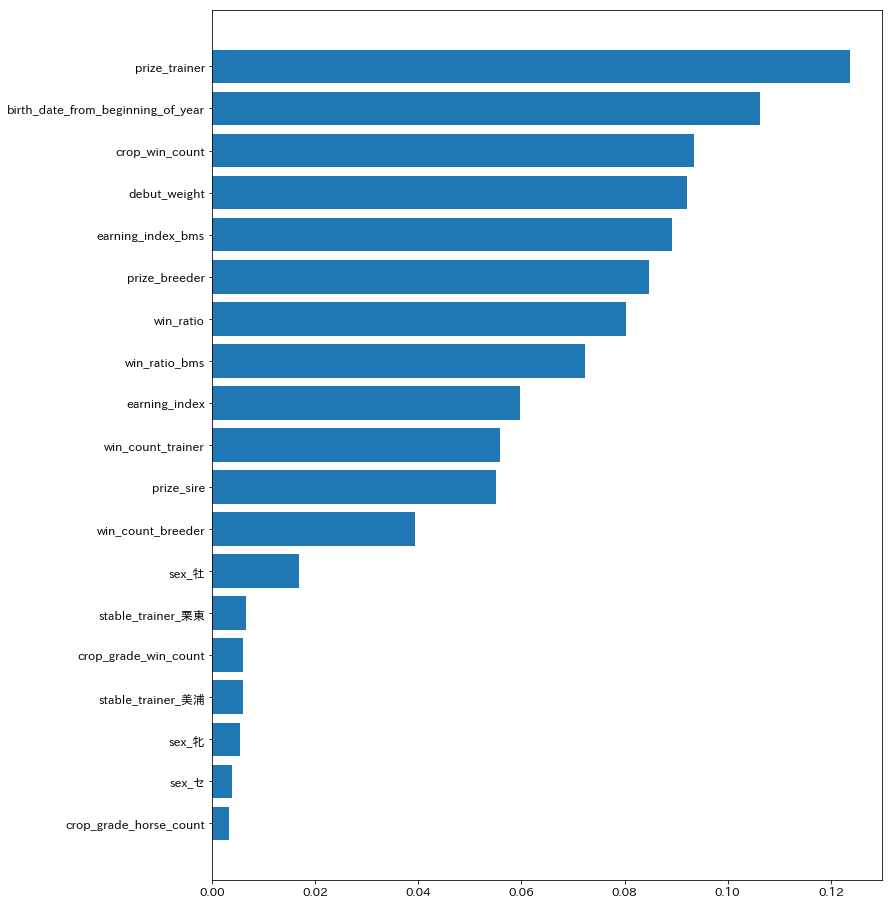

In [23]:
plt.figure(figsize=(12, 16))
plt.barh(df.columns[indices], reg.feature_importances_[indices])

In [24]:
y_pred = reg.predict(X_train)

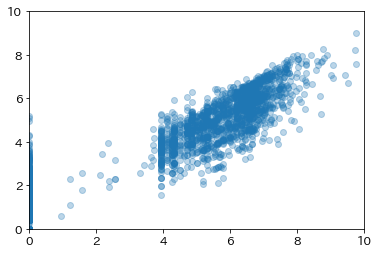

In [28]:
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.scatter(y_train, y_pred, alpha=0.3)

In [29]:
y_pred = reg.predict(X_test)

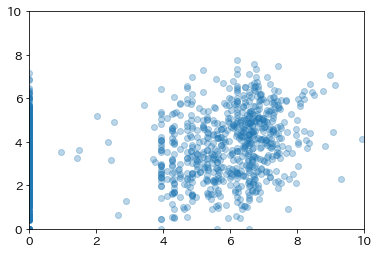

In [30]:
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.scatter(y_test, y_pred, alpha=0.3)

In [31]:
# 予測するyの範囲をクリッピングしてみる

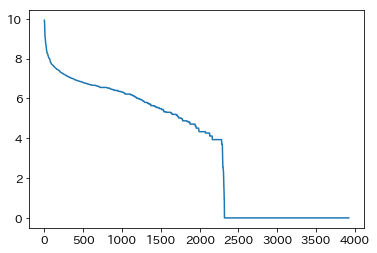

In [32]:
plt.plot(y)

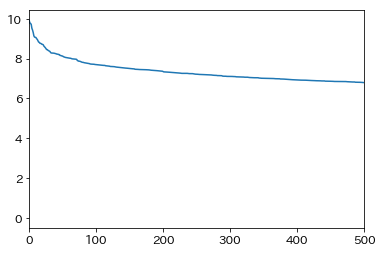

In [33]:
plt.xlim(0, 500)
plt.plot(y)

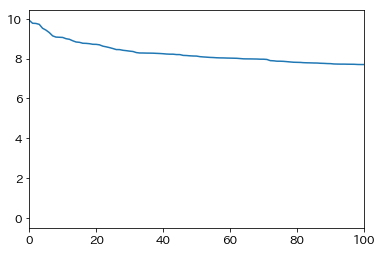

In [34]:
plt.xlim(0, 100)
plt.plot(y)

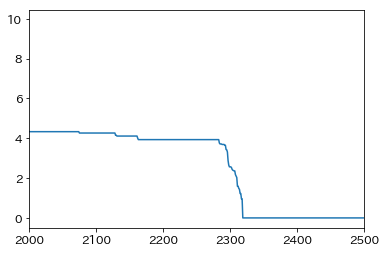

In [35]:
plt.xlim(2000, 2500)
plt.plot(y)

In [36]:
# 20-2200位を対象にする
target_rank = list(range(20, 2200))

In [37]:
X_train, X_test, y_train, y_test  = train_test_split(X.iloc[target_rank], y[target_rank], test_size=0.3, random_state=42)

In [38]:
reg = RandomForestRegressor()

In [39]:
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [40]:
reg.score(X_train, y_train), reg.score(X_test, y_test)

(0.8479179872919852, 0.09531757263781103)

In [41]:
indices = np.argsort(reg.feature_importances_)

<BarContainer object of 19 artists>

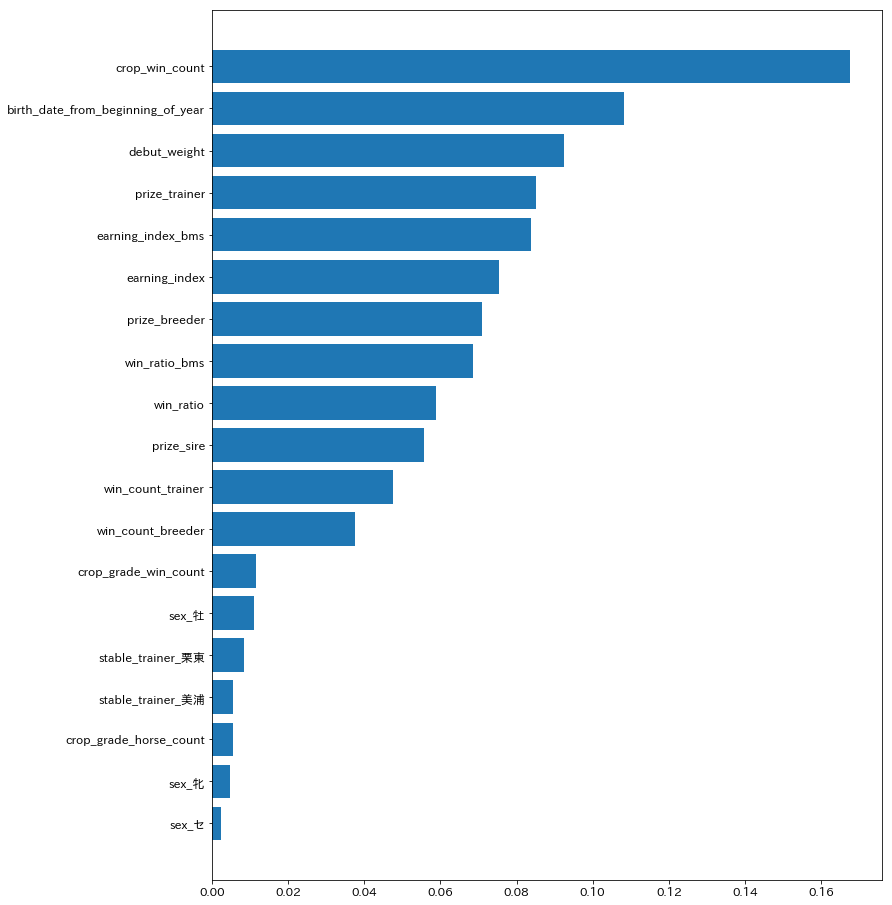

In [42]:
plt.figure(figsize=(12, 16))
plt.barh(df.columns[indices][:50], reg.feature_importances_[indices][:50])

In [43]:
y_pred = reg.predict(X_train)

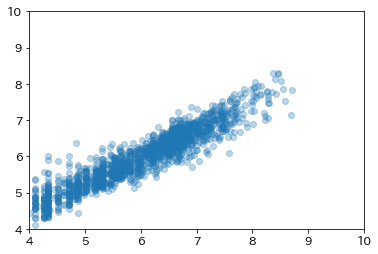

In [44]:
plt.xlim(4, 10)
plt.ylim(4, 10)
plt.scatter(y_train, y_pred, alpha=0.3)

In [45]:
y_pred = reg.predict(X_test)

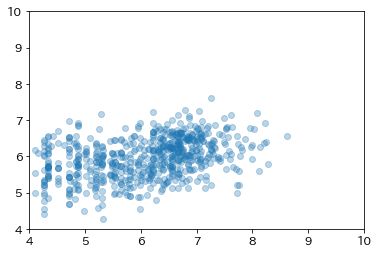

In [46]:
plt.xlim(4, 10)
plt.ylim(4, 10)
plt.scatter(y_test, y_pred, alpha=0.3)